# Tumor detection using Binarization and Labeling :

- This method is quite basic. It allows its user to have fast results that are possible to visualize, howerver the thresholding part is rather subjective, it makes the results difficult for interpretation. The size of the tumor should decrease, but this method says the opposite which is false (+7% progression!!!).

- Cette méthode est plutôt basique. Et pourtant, elle permet très rapidement d'avoir un résultat que l'on peut visualiser, cependant faire bêtement une binarisation n'est pas très fondé car le choix du seuil est arbitraire. Normalement après traitement la taille de la tumeur devrait baisser, or ici la méthode indique une croissance d'environ 7%, ce qui est donc faux.

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage import measure
from collections import Counter

## Loading the MRI images

In [2]:
IRMcoupe17_t1 = Image.open('./images/IRMcoupe17-t1.jpg')
IRMcoupe17_t2 = Image.open('./images/IRMcoupe17-t2.jpg')

IRMcoupe17_t1 = np.array(IRMcoupe17_t1)
IRMcoupe17_t2 = np.array(IRMcoupe17_t2)

## Visualizing the images

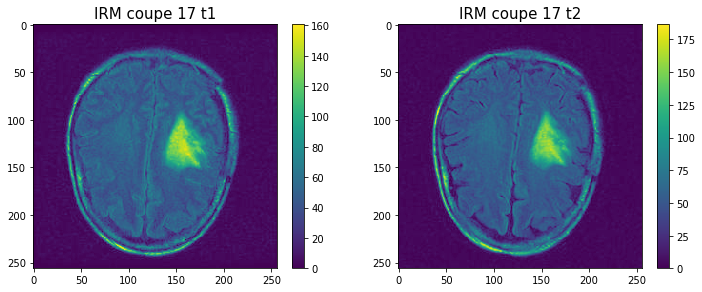

In [3]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.imshow(IRMcoupe17_t1)
plt.title('IRM coupe 17 t1', fontsize=15)
plt.colorbar(shrink=0.9)

plt.subplot(1, 2, 2)
plt.imshow(IRMcoupe17_t2)
plt.title('IRM coupe 17 t2', fontsize=15)
plt.colorbar(shrink=0.9)

plt.show()

## Visualization of the histograms

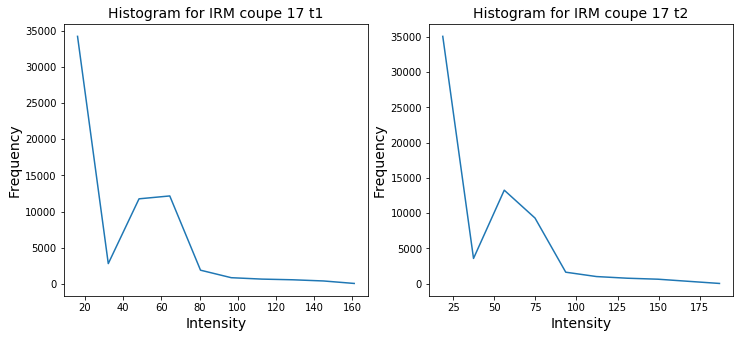

In [4]:
frequencies1, intensities1 = np.histogram(IRMcoupe17_t1)
frequencies2, intensities2 = np.histogram(IRMcoupe17_t2)

# Make both arrays of the same size
intensities1 = intensities1[1:]
intensities2 = intensities2[1:]

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(intensities1, frequencies1)
plt.title("Histogram for IRM coupe 17 t1", fontsize=14)
plt.xlabel("Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(intensities2, frequencies2)
plt.title("Histogram for IRM coupe 17 t2", fontsize=14)
plt.xlabel("Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

## Binarization

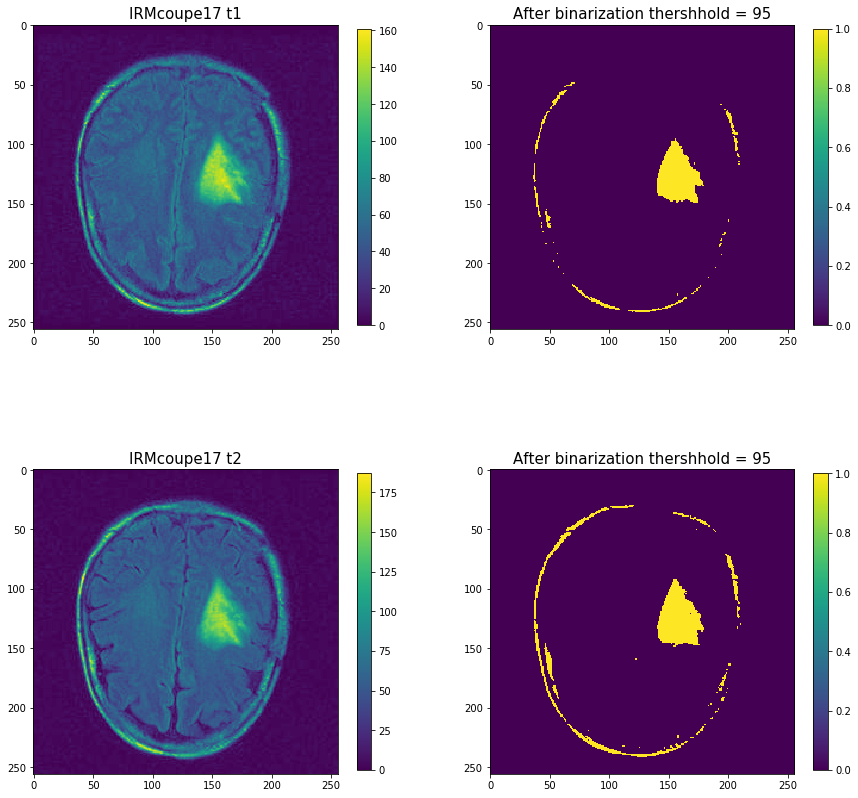

In [5]:
# This threshold value seems to be plausible but
# the choice here is a little bit arbitrary but
# it must be above 80 and not too big ...
threshold = 95

# Making Empty new images
IRMcoupe17_t1_Binarized = np.zeros(IRMcoupe17_t1.shape)
IRMcoupe17_t2_Binarized = np.zeros(IRMcoupe17_t2.shape)

# Binarization
IRMcoupe17_t1_Binarized[IRMcoupe17_t1 > threshold] = 1
IRMcoupe17_t2_Binarized[IRMcoupe17_t2 > threshold] = 1

####### Visualization  ##########
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.imshow(IRMcoupe17_t1)
plt.title('IRMcoupe17 t1', fontsize=15)
plt.colorbar(shrink=0.8)

plt.subplot(2, 2, 2)
plt.imshow(IRMcoupe17_t1_Binarized)
plt.title('After binarization thershhold = {}'.format(threshold), fontsize=15)
plt.colorbar(shrink=0.8)


plt.subplot(2, 2, 3)
plt.imshow(IRMcoupe17_t2)
plt.title('IRMcoupe17 t2', fontsize=15)
plt.colorbar(shrink=0.8)

plt.subplot(2, 2, 4)
plt.imshow(IRMcoupe17_t2_Binarized)
plt.title('After binarization thershhold = {}'.format(threshold), fontsize=15)
plt.colorbar(shrink=0.8)

plt.show()

## Tumor detection using Labeling, and growth factor computation

In [6]:
# Doing the labeling
IRMcoupe17_t1_Labeled = measure.label(IRMcoupe17_t1_Binarized)
IRMcoupe17_t2_Labeled = measure.label(IRMcoupe17_t2_Binarized)

# Here we assume that the tumor is the second element
# in term of area after the background ...

# Getting the label of tumor first IRM
count = Counter(IRMcoupe17_t1_Labeled.ravel())
tumor1_label, _ = count.most_common(2)[1]

# Getting the label of tumor second IRM
count = Counter(IRMcoupe17_t2_Labeled.ravel())
tumor2_label, _ = count.most_common(2)[1]

# Initializing tumor images
Tumor1 = np.zeros(IRMcoupe17_t1.shape)
Tumor2 = np.zeros(IRMcoupe17_t1.shape)

Tumor1[IRMcoupe17_t1_Labeled == tumor1_label] = 1
Tumor2[IRMcoupe17_t2_Labeled == tumor2_label] = 1
        

# Computing thze growth factor ...
TumorSizeBefore = np.sum(Tumor1)
TumorSizeAfter  = np.sum(Tumor2)

growthFactor = 100*(TumorSizeAfter - TumorSizeBefore)/TumorSizeBefore

# Adding the countour of the tumor ...
IRMcoupe17_t1_Diagnose = IRMcoupe17_t1.copy()
IRMcoupe17_t2_Diagnose = IRMcoupe17_t2.copy()

# Finding the tumor contour
for i, j in measure.find_contours(Tumor1, level=0)[0]:
    IRMcoupe17_t1_Diagnose[int(i)][int(j)] = 200

for i, j in measure.find_contours(Tumor2, level=0)[0]:
    IRMcoupe17_t2_Diagnose[int(i)][int(j)] = 200